In [1]:
import pandas as pd
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import matplotlib.pyplot as plt
from math import *
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
import numpy as np

%matplotlib inline

plt.rc("font", size=14)
import seaborn as sns
url_ab = 'https://raw.githubusercontent.com/ormarketing/Analytical-Decision-Making/master/ab.csv'
df_ab = pd.read_csv(url_ab)

/Users/orubel/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df_ab.head()

,Week,Collection,Radio,Calls
0,1,2652,0,12497
1,2,2785,0,13911
2,3,2635,0,15291
3,4,2824,0,15096
4,5,2850,0,14652


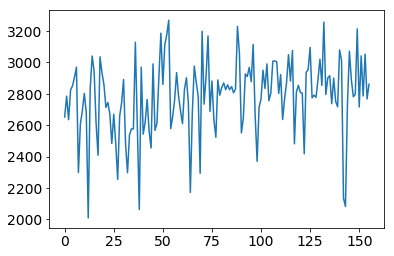

In [3]:
plt.plot(df_ab['Collection'])


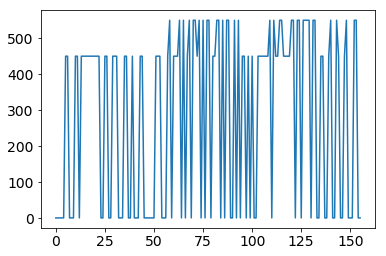

In [4]:
plt.plot(df_ab['Radio'])


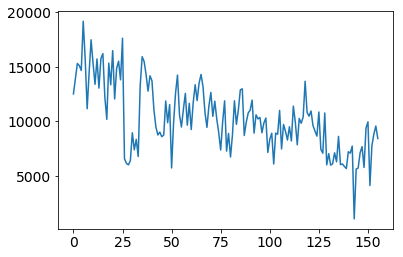

In [30]:
plt.plot(df_ab['Calls'])

In [5]:
scaling=5
xR=np.sqrt(df_ab['Radio'])
xC=np.sqrt(df_ab['Calls'])
y=df_ab['Collection']


xR=np.array(xR)
xC=np.array(xC)
y=np.array(y)/scaling

# OLS Estimation

In [6]:
import statsmodels.api as sm
ra=y.shape[0]
raa=ra-1
yy=y[1:ra]
xx=np.transpose(np.array([xR[1:ra],xC[1:ra],y[0:ra-1]]))
reg1 = sm.OLS(yy,xx)
type(reg1)
results = reg1.fit()
type(results)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     5220.
Date:                Fri, 25 May 2018   Prob (F-statistic):          4.89e-153
Time:                        11:17:05   Log-Likelihood:                -840.54
No. Observations:                 155   AIC:                             1687.
Df Residuals:                     152   BIC:                             1696.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.4987      0.406      3.694      0.0

In [7]:
results.params[0]#Extracting Parameters
bb=results.params

In [14]:
np.mean(y)

556.85128205128194

In [24]:
print(bb)

[ 1.49870461  1.00818554  0.77955747]


# Kalman Filter 

In [8]:

init=y[0]
def KF(b):
    """Two Step Kalman Filter for scalar case"""
    z=1
    beta1=b[0]
    beta2=b[1]
    Tt=b[2]
    h=b[3]**(2)
    q=b[3]**(2)
    #q=b[4]**(2)
    likeli=0
    icount=0
    at=init
    pt=np.mean(y)*4
    while icount <ra:
        ptm1=pt
        atm1=at
        drift=beta1*xR[icount]+beta2*xC[icount]
        attm1=Tt*atm1+drift #yhat
        pttm1=Tt*ptm1*Tt+q
        f=z*pttm1*z+h
        err=y[icount]-attm1
        kgain=pttm1*z*f**(-1)
        at=attm1+kgain*err
        pt=pttm1-kgain*z*pttm1
        likeli=likeli+0.5*(log(f)+err**(2)*f**(-1))
        at=Tt*at+drift+Tt*kgain*err;
        icount=icount+1
    return likeli

In [10]:
scaling=5
df_ab = pd.read_csv(url_ab)
xR=np.sqrt(df_ab['Radio'])
xC=np.sqrt(df_ab['Calls'])
y=df_ab['Collection']
xR=np.array(xR)
xC=np.array(xC)
y=np.array(y)/scaling
b=[bb[0],bb[1],bb[2],50]
sol1=minimize(KF, b, method="BFGS",tol=0.0001)
sol1

      fun: 710.2742625731278
 hess_inv: array([[  2.28724820e-03,   2.34088429e-04,  -8.87450574e-05,
          1.03601561e-03],
       [  2.34088429e-04,   3.14943132e-02,  -5.68000323e-03,
          1.48769054e-04],
       [ -8.87450574e-05,  -5.68000323e-03,   1.04802913e-03,
         -1.90027039e-06],
       [  1.03601561e-03,   1.48769054e-04,  -1.90027039e-06,
          3.47314080e-02]])
      jac: array([  0.00000000e+00,   7.62939453e-06,  -1.52587891e-05,
        -1.52587891e-05])
  message: 'Optimization terminated successfully.'
     nfev: 192
      nit: 21
     njev: 32
   status: 0
  success: True
        x: array([  1.07279375,   0.82517939,   0.82288643,  37.21898013])